Chi-square statistic: 5.83333
Degrees of freedom: 1
Critical value (α = 0.05): 3.84146
p-value: 0.01573
❌ Reject the null hypothesis – there is a relationship between gender and sport participation.


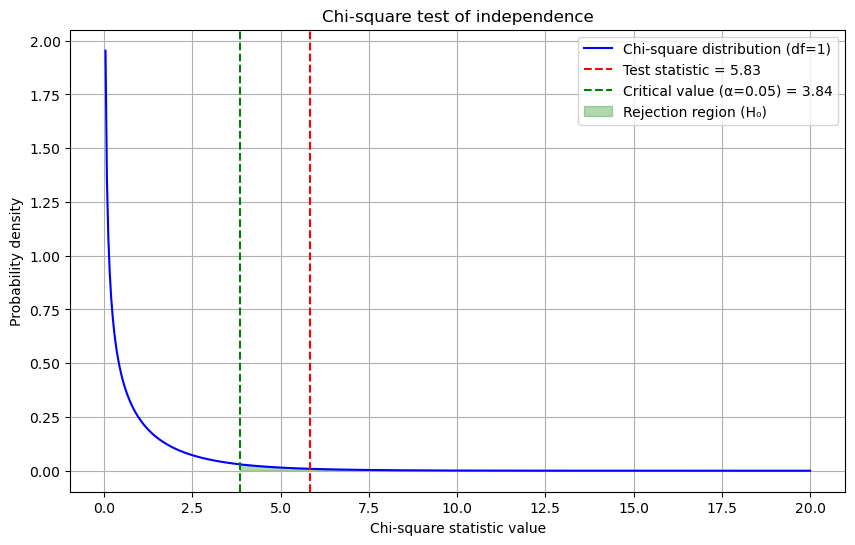

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data (2x2 contingency table): [ [sport, no sport], ... ]
data = np.array([
    [20, 10],  # Male
    [15, 25] # Female
])

# Chi-square independence test
chi2_stat, p_value, df, expected = stats.chi2_contingency(data, correction=False)
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)

# Test results
print(f"Chi-square statistic: {chi2_stat:.5f}")
print("Degrees of freedom:", df)
print(f"Critical value (α = 0.05): {critical_value:.5f}")
print(f"p-value: {p_value:.5f}")

# Hypothesis testing. Null hypothesis - there is no relationship between gender and sports participation
if chi2_stat > critical_value:
    print("❌ Reject the null hypothesis – there is a relationship between gender and sport participation.")
else:
    print("✅ Fail to reject the null hypothesis – no significant relationship detected.")

# Chi-square distribution chart
x = np.linspace(0, 20, 500)
y = stats.chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-square distribution (df={df})', color='blue')
plt.axvline(chi2_stat, color='red', linestyle='--', label=f'Test statistic = {chi2_stat:.2f}')
plt.axvline(critical_value, color='green', linestyle='--', label=f'Critical value (α=0.05) = {critical_value:.2f}')
plt.fill_between(x, y, where=(x > critical_value), color='green', alpha=0.3, label='Rejection region (H₀)')
plt.title("Chi-square test of independence")
plt.xlabel("Chi-square statistic value")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True)
plt.show()